# Assignment 5 - Regression

## Setup

In [91]:
#Importing the required APIs 

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

import seaborn as sns
from sklearn.model_selection import train_test_split

# For Normalizing
from sklearn.preprocessing import StandardScaler

# Linear Regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

#Ada Boosting
from sklearn.ensemble import AdaBoostRegressor

import random
import math
import time


In [2]:
#Setting Maximum displayed rows and columns and Maximum display width and height

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', 199)

## Data

### Getting Data

In [3]:
#Loaded data of Iris.csv is stored as Iris_df
#index_col is used to initialise Id column as the index

data_df = pd.read_csv("boston_house_prices.csv", header=[1])

data_df.index.name = "Id"

data_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
Id                                                                              
0   0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1   0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2   0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3   0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4   0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

         B  LSTAT  MEDV  
Id                       
0   396.90   4.98  24.0  
1   396.90   9.14  21.6  
2   392.83   4.03  34.7  
3   394.63   2.94  33.4  
4   396.90   5.33  36.2

In [4]:
#Checking for duplicates
duplicate_check = data_df.duplicated();

duplicate_check.describe()

count       506
unique        1
top       False
freq        506
dtype: object

<p>No duplicate values as shown above by the the duplicated series having only 1 unique value of false</p>

### Continuous values & Categorical Features

In [5]:
for col in data_df.columns:
    print(col, len(data_df[col].unique()))
    print()


CRIM 504

ZN 26

INDUS 76

CHAS 2

NOX 81

RM 446

AGE 356

DIS 412

RAD 9

TAX 66

PTRATIO 46

B 357

LSTAT 455

MEDV 229



<p>ZN, CHAS, RAD and TAX appear to be categorical features from their number of unique values and given description</p>

<ul>ZN : <b>ZN</b> represents zoned land for lots over 25000<i>sqft</i> which also seems predefined by local ruling body</ul>
<ul>CHAS : <b>CHAS</b> is a dummy variable having either a value of 0 or 1</ul>
<ul>RAD : <b>RAD</b> is an present index representing access to radial highways</ul>
<ul>TAX : <b>TAX</b> here appears to be a preset property tax rate at a particular location</ul>

In [6]:
# ZN
print("ZN : ", len(data_df["ZN"].unique()), "\n", data_df["ZN"].unique())
print()
# CHAS
print("CHAS : ", len(data_df["CHAS"].unique()), "\n", data_df["CHAS"].unique())
print()
# RAD
print("RAD : ", len(data_df["RAD"].unique()), "\n", data_df["RAD"].unique())
print()
# TAX
print("TAX : ", len(data_df["TAX"].unique()), "\n", data_df["TAX"].unique())

ZN :  26 
 [ 18.    0.   12.5  75.   21.   90.   85.  100.   25.   17.5  80.   28.
  45.   60.   95.   82.5  30.   22.   20.   40.   55.   52.5  70.   34.
  33.   35. ]

CHAS :  2 
 [0 1]

RAD :  9 
 [ 1  2  3  5  4  8  6  7 24]

TAX :  66 
 [296 242 222 311 307 279 252 233 243 469 226 313 256 284 216 337 345 305
 398 281 247 270 276 384 432 188 437 403 193 265 255 329 402 348 224 277
 300 330 315 244 264 223 254 198 285 241 293 245 289 358 304 287 430 422
 370 352 351 280 335 411 187 334 666 711 391 273]


### Zero Check and Resolution

In [7]:
data_df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [8]:
# Selecting columns that we don't want to be zero
columns = ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Performing zero and NAN check
for x in columns:
    data_df[x] = data_df[x].replace(0, np.NAN)
    mean = int(data_df[x].mean(skipna=True))
    data_df[x] = data_df[x].replace(np.NAN, mean)


# Checking for Mean values - no change indicates no zero values
data_df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

<p>No changes in values shows us that no null or zero values were present in the desired columns</p>

### Outliers

In [9]:
# Selecting columns that has continuous data
columns = ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
ind = set()

for col in columns:
    print(col, " : ", len(data_df[(abs(data_df[col] - data_df[col].mean()) > 3 * data_df[col].std())]))
    print(data_df[(abs(data_df[col] - data_df[col].mean()) > 3 * data_df[col].std())])
    # ind.add(data_df[(abs(data_df[col] - data_df[col].mean()) > 3 * data_df[col].std())].index)
    # print()
    for x in data_df[(abs(data_df[col] - data_df[col].mean()) > 3 * data_df[col].std())].index:
        ind.add(x)
    print()

ind

CRIM  :  8
        CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
Id                                                                      
380  88.9762  0.0   18.1     0  0.671  6.968   91.9  1.4165   24  666   
398  38.3518  0.0   18.1     0  0.693  5.453  100.0  1.4896   24  666   
404  41.5292  0.0   18.1     0  0.693  5.531   85.4  1.6074   24  666   
405  67.9208  0.0   18.1     0  0.693  5.683  100.0  1.4254   24  666   
410  51.1358  0.0   18.1     0  0.597  5.757  100.0  1.4130   24  666   
414  45.7461  0.0   18.1     0  0.693  4.519  100.0  1.6582   24  666   
418  73.5341  0.0   18.1     0  0.679  5.957  100.0  1.8026   24  666   
427  37.6619  0.0   18.1     0  0.679  6.202   78.7  1.8629   24  666   

     PTRATIO       B  LSTAT  MEDV  
Id                                 
380     20.2  396.90  17.21  10.4  
398     20.2  396.90  30.59   5.0  
404     20.2  329.46  27.38   8.5  
405     20.2  384.97  22.98   5.0  
410     20.2    2.60  10.11  15.0  
414   

{102,
 141,
 225,
 257,
 262,
 351,
 352,
 353,
 354,
 355,
 364,
 365,
 367,
 373,
 374,
 380,
 398,
 404,
 405,
 406,
 410,
 411,
 412,
 414,
 415,
 416,
 418,
 419,
 423,
 424,
 425,
 426,
 427,
 429,
 431,
 436,
 437,
 438,
 445,
 450,
 454,
 455,
 456,
 457,
 466}

<p>CRIM, RM, DIS, B and LSTAT contain outliers according to z score analysis(abs(val - mean) > 3 * std). Out of all the values B seems to have the maximum outliers making a total of 25 outliers.</p>
<p>I am not removing any outliers in order to make my models have a generalized prediction.</p>

In [10]:
data_df["B"].describe()

count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: B, dtype: float64

In [11]:
#Dropping Outliers
for x in ind:
    # print (x)
    data_df = data_df.drop(index = x);


len(data_df)

461

### Data Correlation

#### Pair Plot Scatter Map

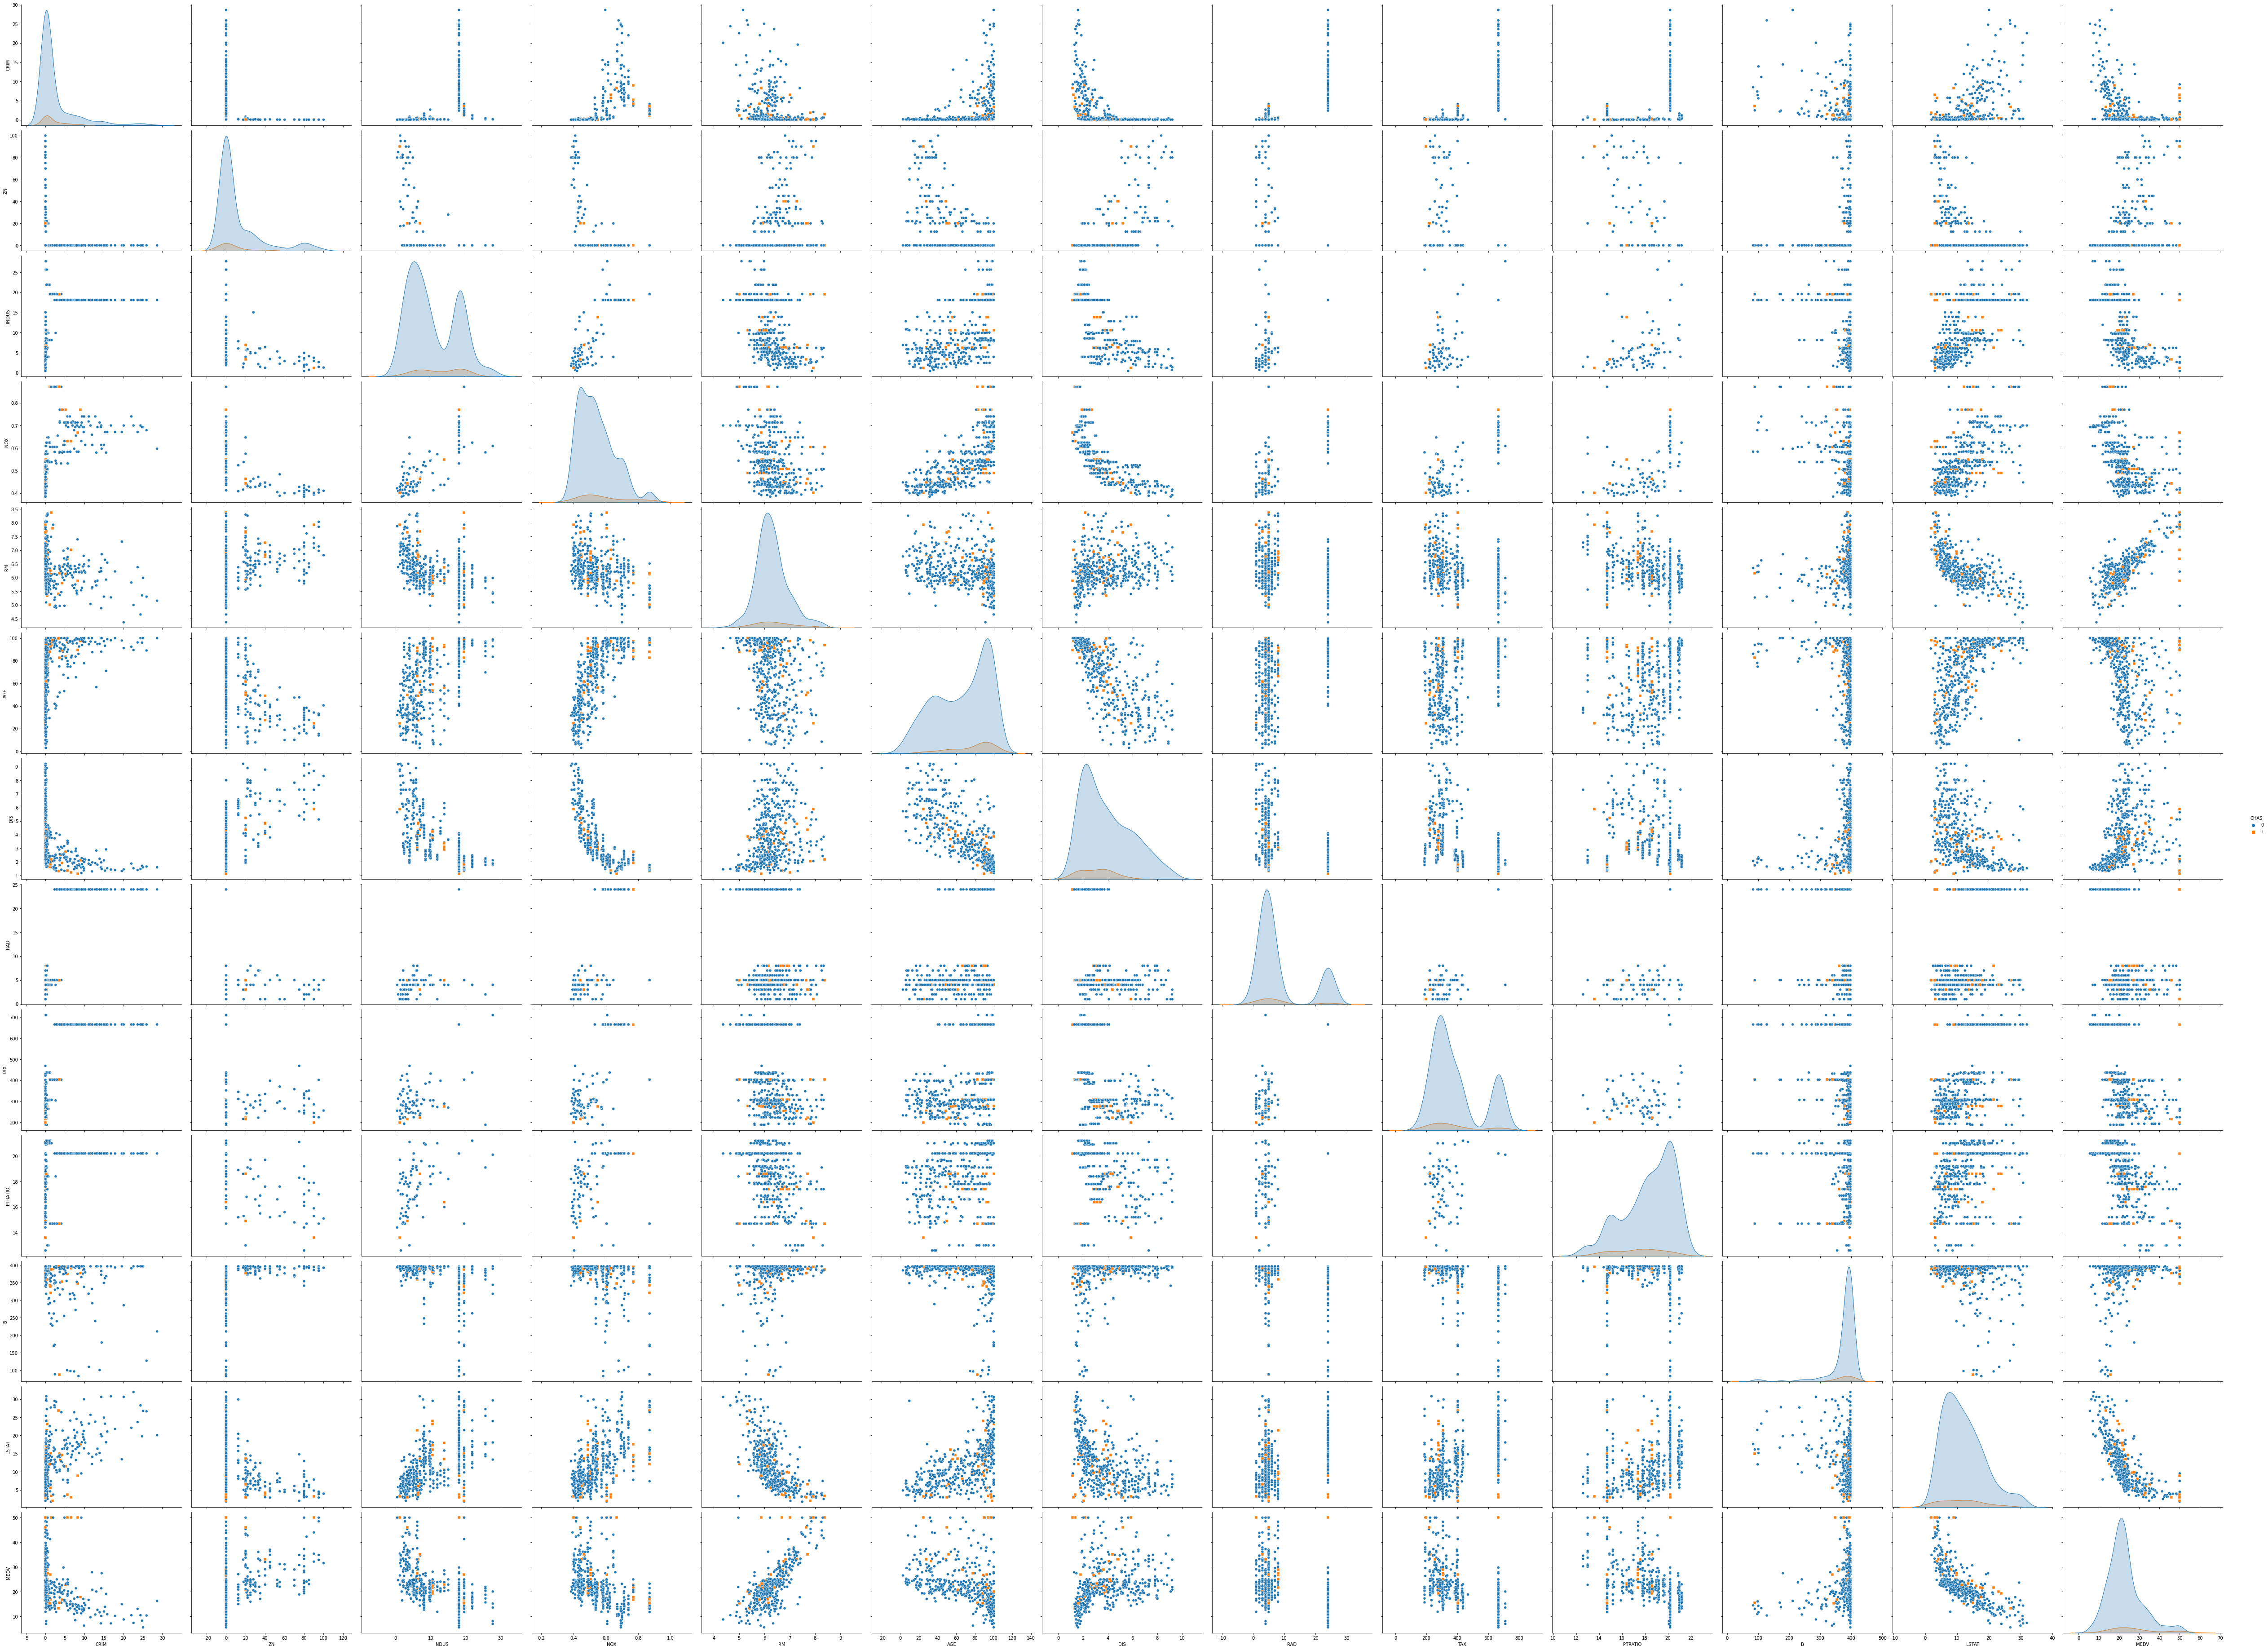

In [12]:
sns.pairplot(data=data_df, hue="CHAS", markers=["o", "s"], height= 4, aspect=1.35)

#### Pair Plot Heat Map

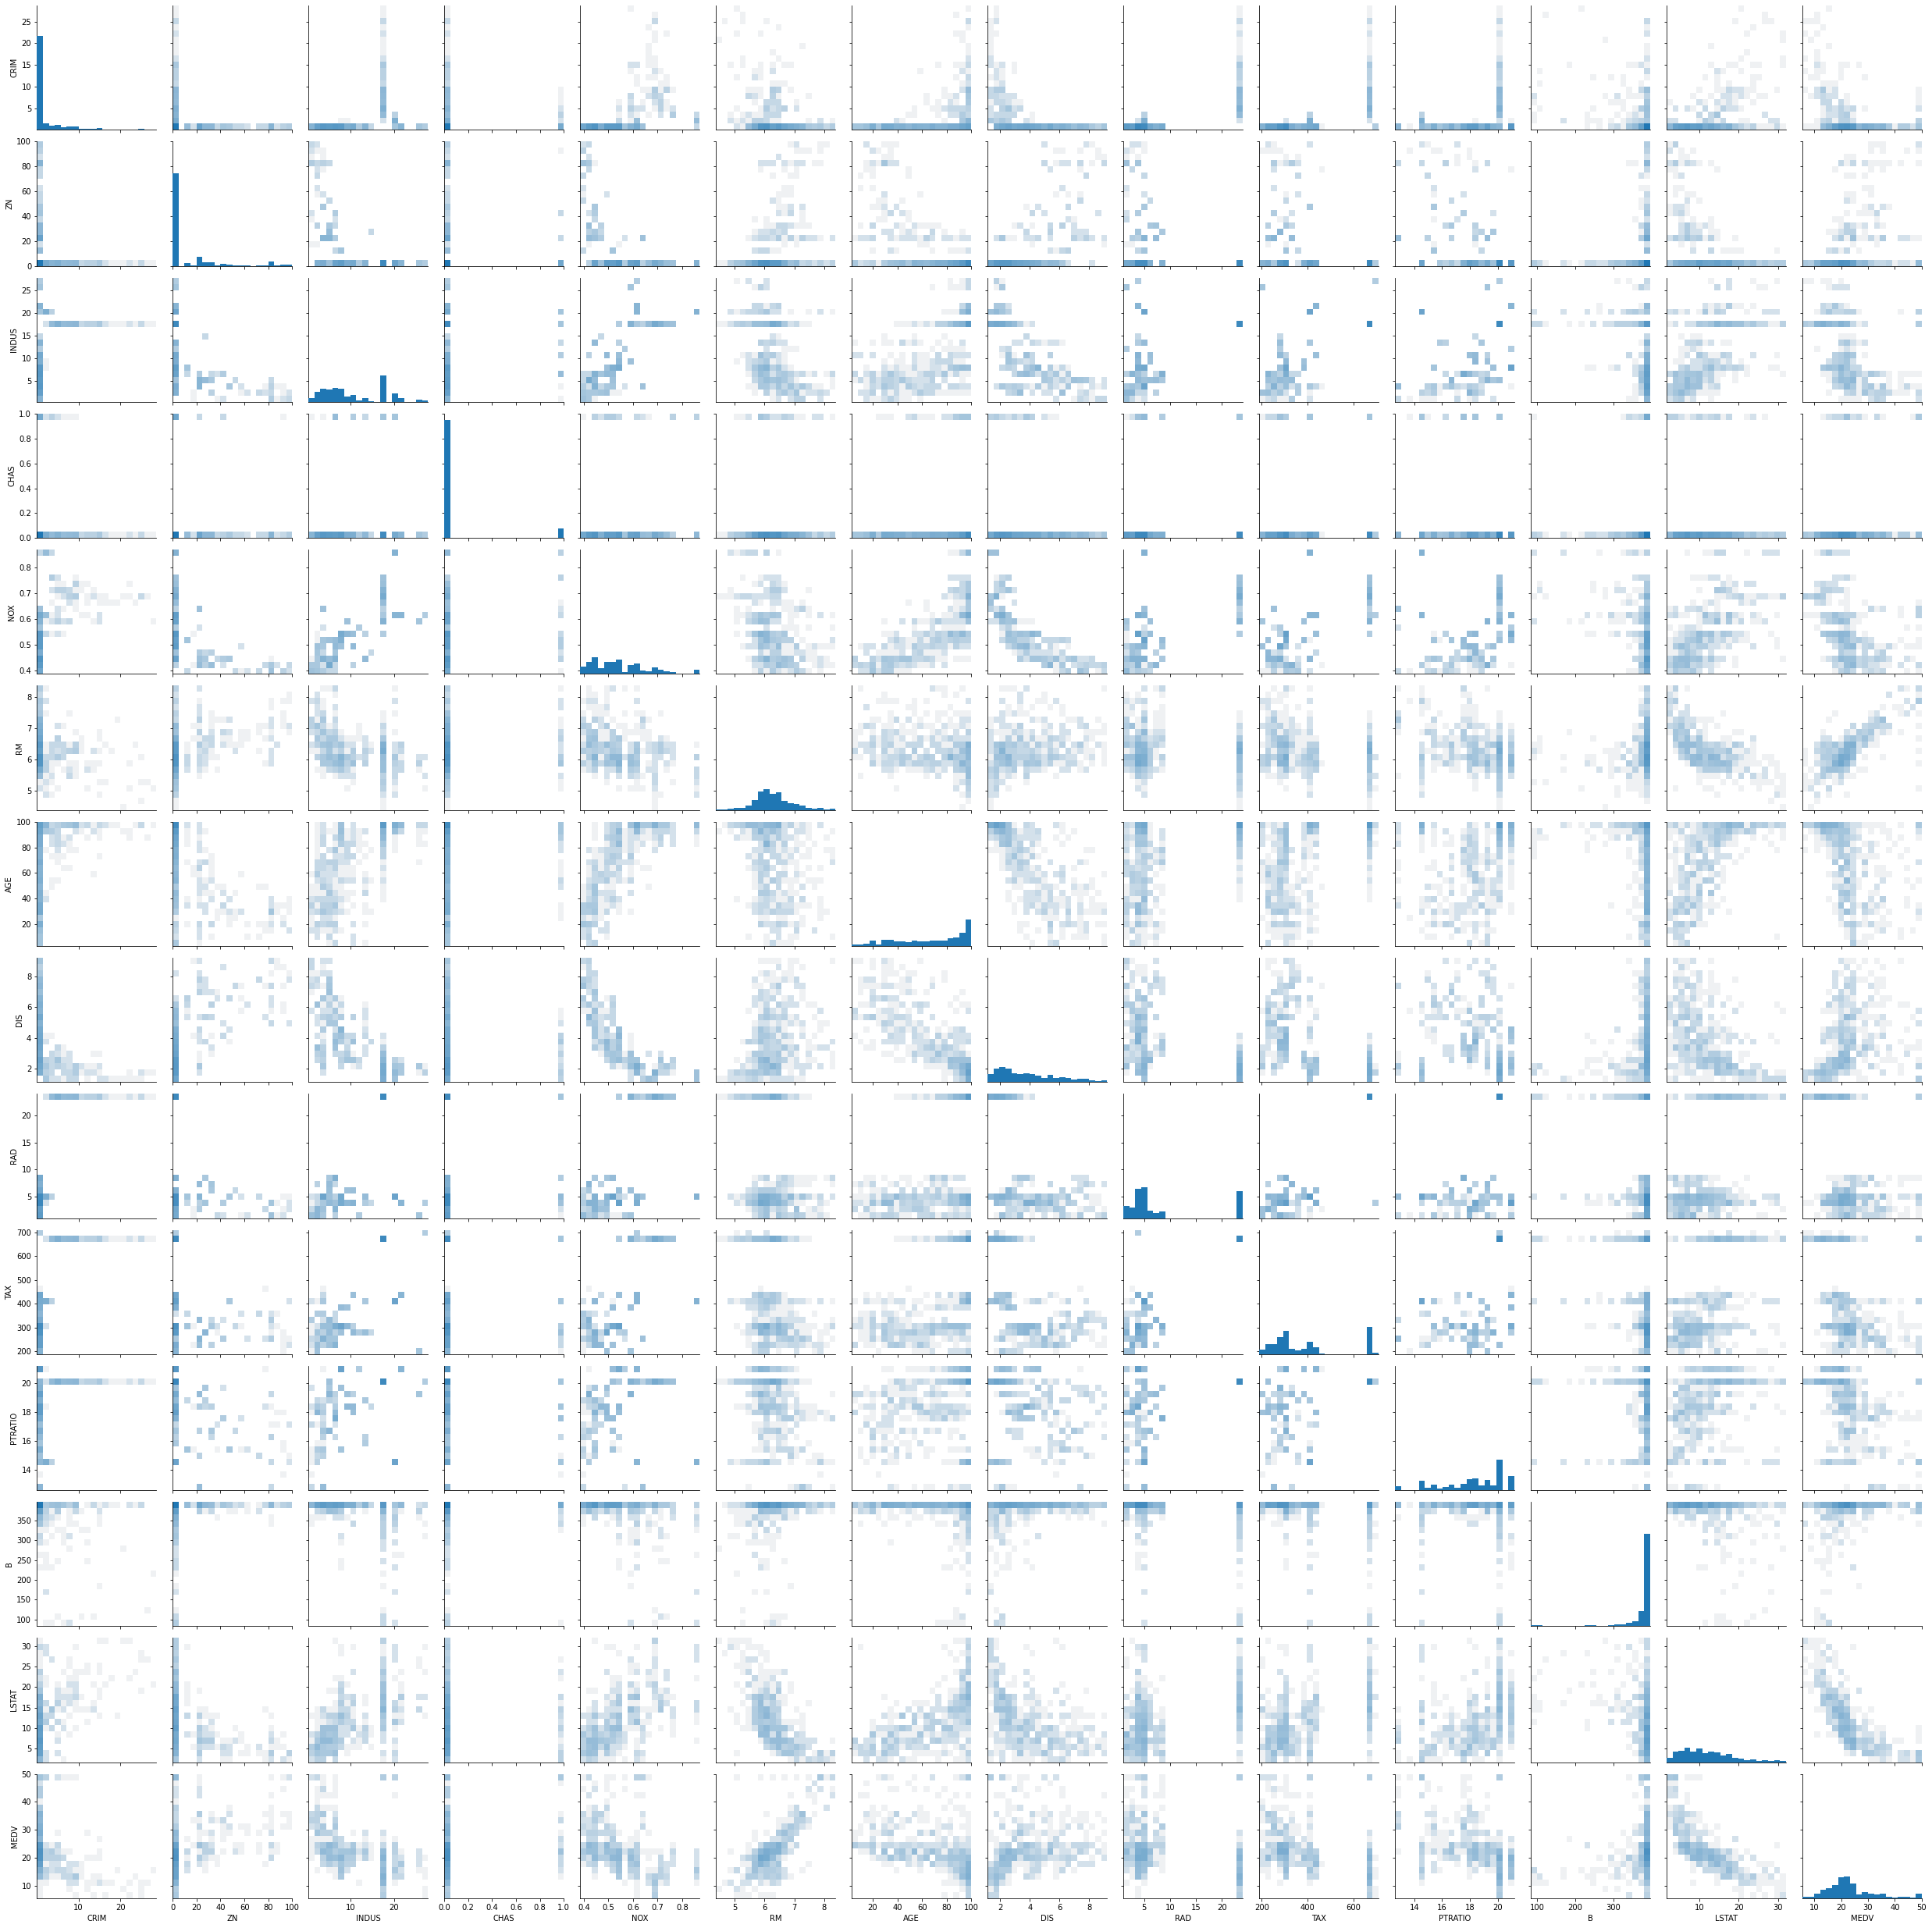

In [13]:
g = sns.PairGrid(data_df)
g.map_diag(plt.hist, bins=20)

def pairgrid_heatmap(x, y, **kws):
    cmap = sns.light_palette(kws.pop("color"), as_cmap=True)
    plt.hist2d(x, y, cmap=cmap, cmin=1, **kws)

g.map_offdiag(pairgrid_heatmap, bins=20, norm=LogNorm())

#### Correlation Matrix

##### Representation

In [14]:
data_df.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.239352  0.498702 -0.032211  0.532755 -0.254300  0.419606   
ZN      -0.239352  1.000000 -0.511177 -0.044200 -0.500029  0.355561 -0.549795   
INDUS    0.498702 -0.511177  1.000000  0.075857  0.750896 -0.400241  0.624409   
CHAS    -0.032211 -0.044200  0.075857  1.000000  0.106137  0.066226  0.102748   
NOX      0.532755 -0.500029  0.750896  0.106137  1.000000 -0.336042  0.717651   
RM      -0.254300  0.355561 -0.400241  0.066226 -0.336042  1.000000 -0.254982   
AGE      0.419606 -0.549795  0.624409  0.102748  0.717651 -0.254982  1.000000   
DIS     -0.457369  0.628812 -0.697373 -0.116073 -0.770682  0.222299 -0.736469   
RAD      0.794732 -0.282413  0.549955  0.011386  0.570975 -0.179179  0.413717   
TAX      0.733121 -0.287018  0.695997 -0.021669  0.641241 -0.272284  0.476377   
PTRATIO  0.334314 -0.410068  0.349685 -0.119455  0.155324 -0.335409  0.248017   
B       -0.301971  0.150265 -0.321643 -0.006221 -0.371104  0.151359 -0.240199   
LSTAT    0.520860 -0.410986  0.581738 -0.026114  0.579992 -0.654664  0.598819   
MEDV    -0.375407  0.366898 -0.443760  0.175650 -0.401917  0.752448 -0.367967   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.457369  0.794732  0.733121  0.334314 -0.301971  0.520860 -0.375407  
ZN       0.628812 -0.282413 -0.287018 -0.410068  0.150265 -0.410986  0.366898  
INDUS   -0.697373  0.549955  0.695997  0.349685 -0.321643  0.581738 -0.443760  
CHAS    -0.116073  0.011386 -0.021669 -0.119455 -0.006221 -0.026114  0.175650  
NOX     -0.770682  0.570975  0.641241  0.155324 -0.371104  0.579992 -0.401917  
RM       0.222299 -0.179179 -0.272284 -0.335409  0.151359 -0.654664  0.752448  
AGE     -0.736469  0.413717  0.476377  0.248017 -0.240199  0.598819 -0.367967  
DIS      1.000000 -0.457730 -0.513905 -0.230255  0.256811 -0.473495  0.224998  
RAD     -0.457730  1.000000  0.892814  0.432223 -0.266701  0.419379 -0.298478  
TAX     -0.513905  0.892814  1.000000  0.418860 -0.303733  0.490423 -0.398737  
PTRATIO -0.230255  0.432223  0.418860  1.000000 -0.027061  0.339296 -0.463644  
B        0.256811 -0.266701 -0.303733 -0.027061  1.000000 -0.283900  0.227831  
LSTAT   -0.473495  0.419379  0.490423  0.339296 -0.283900  1.000000 -0.736956  
MEDV     0.224998 -0.298478 -0.398737 -0.463644  0.227831 -0.736956  1.000000

##### Values that have maximum correlation to MEDV (the target feature)

In [15]:
data_df.corr()["MEDV"].sort_values()

LSTAT     -0.736956
PTRATIO   -0.463644
INDUS     -0.443760
NOX       -0.401917
TAX       -0.398737
CRIM      -0.375407
AGE       -0.367967
RAD       -0.298478
CHAS       0.175650
DIS        0.224998
B          0.227831
ZN         0.366898
RM         0.752448
MEDV       1.000000
Name: MEDV, dtype: float64

##### Total Correlation amongst each feature

In [16]:
data_df.corr().abs().sum().sort_values()

CHAS       1.903946
B          3.908797
PTRATIO    4.863610
RM         5.234993
ZN         5.736574
MEDV       6.234690
CRIM       6.494698
RAD        6.569683
AGE        6.750756
DIS        6.786271
LSTAT      7.116621
TAX        7.146179
NOX        7.434745
INDUS      7.501434
dtype: float64

### Train Test Split

In [31]:
# Splitting the data 
features = data_df.iloc[:, 0:13]         #   All features except target feature - X
target = data_df.iloc[:,13]              #   Only Target feature - y

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0, test_size=0.2, train_size=0.8)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(X_test))

X_train = X_train.sort_index()
X_test = X_test.sort_index()
y_train = y_train.sort_index()
y_test = y_test.sort_index()
print()



368
93
368
93



## Models

### Normalizing Function

In [18]:
# Normalizing 
# Fitting is done only using training data
# The test data is only transformed

def Normalize(X_train, X_test) :
    df_min = X_train.min(axis = 0)
    df_max = X_train.max(axis = 0)

    for column in X_train:
        # print(column)
        # print()
        for index in X_train.index :
            X_train[column][index] = (X_train[column][index] - df_min[column]) / (df_max[column] - df_min[column])
            # print (X_train[column][index])

    for column in X_test:
        # print(column)
        # print()
        for index in X_test.index :
            X_test[column][index] = (X_test[column][index] - df_min[column]) / (df_max[column] - df_min[column])
            # print (X_test[column][index])

    return(X_train, X_test)

### Multiple Linear Regression

<p>It was suggested to get good results in linear regression model it is better to use continuous features when compared to categorical features. So for this model I am going to be choosing features keeping in mind their continuous aspect and correlation with target feature.</p>

<p>
<ul><b>Continuous :</b><p> CRIM, INDUS, NOX, RM, AGE, DIS, PTRATIO, B, LSTAT</p></ul>
<ul><b>Correlation :</b><p> RM, LSTAT, PTRATIO, INDUS, NOX, TAX, CRIM, AGE, ZN, RAD, B, DIS, CHAS </p></ul>
</p>

<p>We will choose LSTAT, RM, PTRATIO, INDUS and NOX as features for this model</p>

#### First Try

Time to train :  0.0019931793212890625
Coefficients: 
 [-3.7097192   3.97793283 -1.81723723  0.67985581 -0.22977355]
Mean squared error: 17.05
Coefficient of determination: 0.67


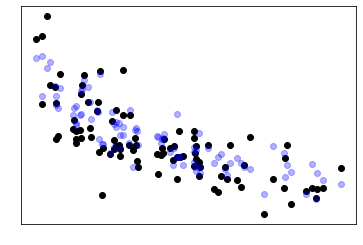

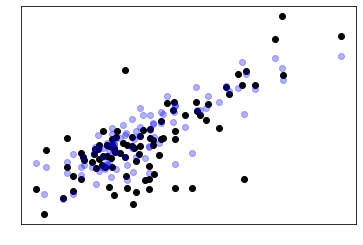

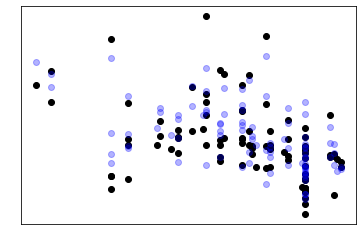

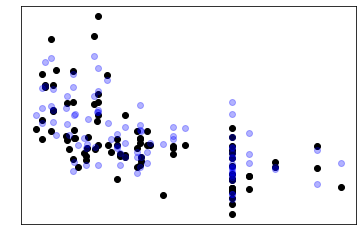

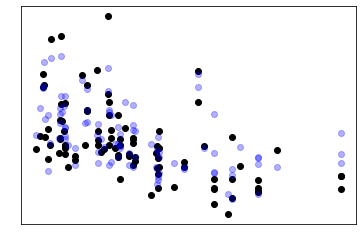

In [32]:
linear_columns = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'NOX']

#Data
Linear_X_train = X_train[linear_columns]
Linear_X_test = X_test[linear_columns]

# print(X_train[linear_columns])

Linear_y_train = y_train
Linear_y_test = y_test

# Scaling the data
# Linear_X_train, Linear_X_test = Normalize(Linear_X_train, Linear_X_test)
sc_X = StandardScaler()

Linear_X_train = sc_X.fit_transform(Linear_X_train)
Linear_X_test = sc_X.transform(Linear_X_test)

# print(Linear_X_train);

start = time.time()

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(Linear_X_train, Linear_y_train)

end = time.time()
print("Time to train : ", end - start)

# Make predictions using the testing set
Linear_y_pred = regr.predict(Linear_X_test)

# print(Linear_y_pred)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Linear_y_test, Linear_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Linear_y_test, Linear_y_pred))

# print(len(Linear_X_test), len(Linear_y_test))

# print(Linear_X_test.T)

col = 0

while col < len(linear_columns):
# for col in linear_columns:
    # Plot outputs
    # plt.scatter(np.array(Linear_X_test[col]), Linear_y_test, color="black")
    # plt.plot(np.array(Linear_X_test[col]), Linear_y_pred, color="blue", linewidth=1)

    plt.scatter(Linear_X_test.T[col], Linear_y_test, color="black")
    plt.scatter(Linear_X_test.T[col], Linear_y_pred, color="blue", linewidth=1, alpha=0.3)

    plt.xlabel(linear_columns[col], color='white')
    plt.ylabel('MEDV', color='white')
    plt.xticks(())
    plt.yticks(())

    plt.show()
    col = col + 1


#### Second Try

This time we will remove INDUS and PTRATIO as well as from the above graphs we can see that both of them have multiple target value at a particular feature value.

Time to train :  0.0010101795196533203
Coefficients: 
 [-4.01253437  4.3233814   0.28957959]
Mean squared error: 18.69
Coefficient of determination: 0.64


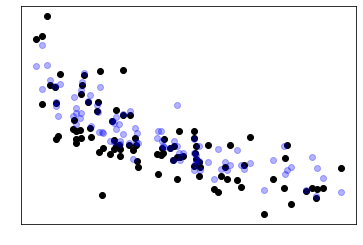

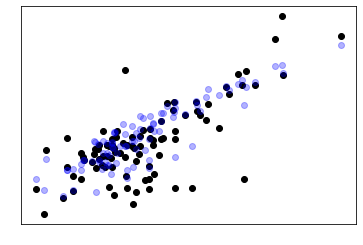

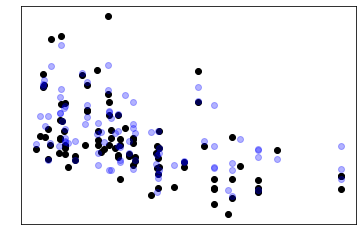

In [33]:
linear_columns = ['LSTAT', 'RM', 'NOX']

#Data
Linear_X_train = X_train[linear_columns]
Linear_X_test = X_test[linear_columns]

# print(X_train[linear_columns])

Linear_y_train = y_train
Linear_y_test = y_test

# Scaling the data
# Linear_X_train, Linear_X_test = Normalize(Linear_X_train, Linear_X_test)
sc_X = StandardScaler()

Linear_X_train = sc_X.fit_transform(Linear_X_train)
Linear_X_test = sc_X.transform(Linear_X_test)

# print(Linear_X_train);

start = time.time()
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(Linear_X_train, Linear_y_train)

end = time.time()
print("Time to train : ", end - start)

# Make predictions using the testing set
Linear_y_pred = regr.predict(Linear_X_test)

# print(Linear_y_pred)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Linear_y_test, Linear_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Linear_y_test, Linear_y_pred))

# print(len(Linear_X_test), len(Linear_y_test))

# print(Linear_X_test.T)

col = 0

while col < len(linear_columns):
# for col in linear_columns:
    # Plot outputs
    # plt.scatter(np.array(Linear_X_test[col]), Linear_y_test, color="black")
    # plt.plot(np.array(Linear_X_test[col]), Linear_y_pred, color="blue", linewidth=1)

    plt.scatter(Linear_X_test.T[col], Linear_y_test, color="black")
    plt.scatter(Linear_X_test.T[col], Linear_y_pred, color="blue", linewidth=1, alpha=0.3)

    plt.xlabel(linear_columns[col], color='white')
    plt.ylabel('MEDV', color='white')
    plt.xticks(())
    plt.yticks(())

    plt.show()
    col = col + 1


#### Summary
<p>There was no significant increase or decrease in mean square error. Both seem to be viable options. First having more features is more inclusive, also from a statistical stand point Model 1 has the better predictive capability as depicted by their R^2 scores.</p>

### Decision Tree Regressor

<p>Decision Tree can do both classification and regression and can use both continuos and categorical features to process regression. So for this model we will strictly use the features that are highly correlated to the target feature.</p>

<p>
<ul><b>Correlation :</b><p> RM, LSTAT, PTRATIO, INDUS, NOX, TAX, CRIM, AGE, ZN, RAD, B, DIS, CHAS </p></ul>
</p>

<p>We will choose the top 6 features.</p>

#### Calculating Appropriate Max Depth

In [34]:
Dec_tree_columns = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'NOX', 'TAX']

#Data
Dec_tree_X_train = X_train[Dec_tree_columns]
Dec_tree_X_test = X_test[Dec_tree_columns]

# print(X_train[linear_columns])

Dec_tree_y_train = y_train
Dec_tree_y_test = y_test

# Scaling the data
# Linear_X_train, Linear_X_test = Normalize(Linear_X_train, Linear_X_test)
sc_X = StandardScaler()

Dec_tree_X_train = sc_X.fit_transform(Dec_tree_X_train)
Dec_tree_X_test = sc_X.transform(Dec_tree_X_test)

i = 2 

while i <= 9:
    start = time.time()

    regr = DecisionTreeRegressor(max_depth=i)
    regr.fit(Dec_tree_X_train, Dec_tree_y_train)

    end = time.time()

    Dec_tree_y_pred = regr.predict(Dec_tree_X_test)

    # Max Depth
    print("Max Depth: \n", i)
    print("Time to train : ", end - start)
    # # The coefficients
    # print("Coefficients: \n", regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(Dec_tree_y_test, Dec_tree_y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(Dec_tree_y_test, Dec_tree_y_pred))

    i = i + 1




Max Depth: 
 2
Time to train :  0.0009968280792236328
Mean squared error: 20.64
Coefficient of determination: 0.61
Max Depth: 
 3
Time to train :  0.00299072265625
Mean squared error: 19.74
Coefficient of determination: 0.62
Max Depth: 
 4
Time to train :  0.0019943714141845703
Mean squared error: 15.06
Coefficient of determination: 0.71
Max Depth: 
 5
Time to train :  0.003000974655151367
Mean squared error: 15.24
Coefficient of determination: 0.71
Max Depth: 
 6
Time to train :  0.001993894577026367
Mean squared error: 14.08
Coefficient of determination: 0.73
Max Depth: 
 7
Time to train :  0.000995635986328125
Mean squared error: 14.61
Coefficient of determination: 0.72
Max Depth: 
 8
Time to train :  0.0029947757720947266
Mean squared error: 15.23
Coefficient of determination: 0.71
Max Depth: 
 9
Time to train :  0.0029926300048828125
Mean squared error: 17.62
Coefficient of determination: 0.66


<p>Max depth of 6 has the least Mean squared error and Highest R^2 value</p>

#### Max Depth 6

Time to train :  0.001965761184692383
Max Depth: 6
Mean squared error: 14.08
Coefficient of determination: 0.73


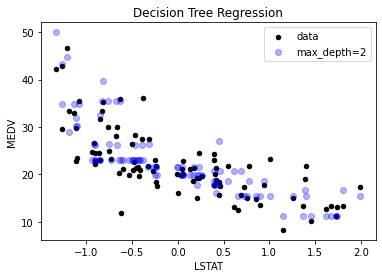

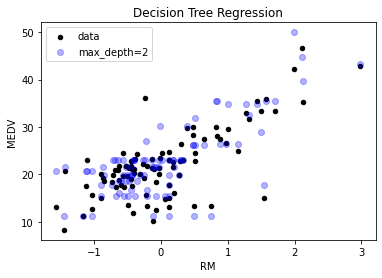

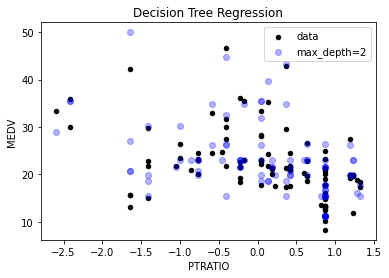

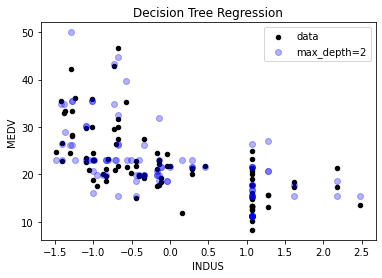

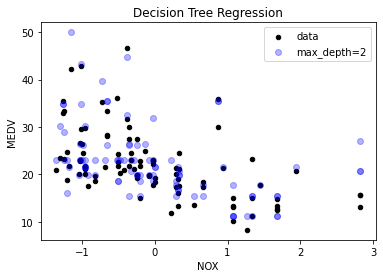

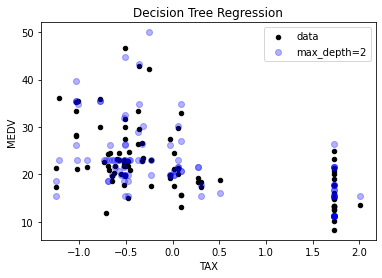

In [35]:
# For Max Depth 6
Dec_tree_columns = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'NOX', 'TAX']

#Data
Dec_tree_X_train = X_train[Dec_tree_columns]
Dec_tree_X_test = X_test[Dec_tree_columns]

# print(X_train[linear_columns])

Dec_tree_y_train = y_train
Dec_tree_y_test = y_test

# Scaling the data
# Linear_X_train, Linear_X_test = Normalize(Linear_X_train, Linear_X_test)
sc_X = StandardScaler()

Dec_tree_X_train = sc_X.fit_transform(Dec_tree_X_train)
Dec_tree_X_test = sc_X.transform(Dec_tree_X_test)

start = time.time()

regr = DecisionTreeRegressor(max_depth=6)
regr.fit(Dec_tree_X_train, Dec_tree_y_train)

end = time.time()
print("Time to train : ", end - start)


Dec_tree_y_pred = regr.predict(Dec_tree_X_test)

# Max Depth
print("Max Depth: 6")
# # The coefficients
# print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Dec_tree_y_test, Dec_tree_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Dec_tree_y_test, Dec_tree_y_pred))

col = 0

while col < len(Dec_tree_columns):
    # Plot the results
    plt.figure()
    plt.scatter(Dec_tree_X_test.T[col], Dec_tree_y_test, s=20, edgecolor="black", c="black", label="data")
    plt.scatter(Dec_tree_X_test.T[col], Dec_tree_y_pred, color="blue", label="max_depth=2", alpha=0.3)
    # plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
    plt.xlabel(Dec_tree_columns[col], color='black')
    plt.ylabel("MEDV", color='black')
    plt.title("Decision Tree Regression")
    plt.legend()
    plt.show()

    col = col + 1





#### Summary
<p>Through iteration we discovered that the maximum depth of 6 gives a model that learns the most information for the current 6 features. I did experiment with more features, but it started decreasing the R^2 value. </p>

### Random Forest Regressor

<p>For the random forest regressor we will use the whole dataset and make sure bootstrapping of dataset is done internally by the regressor code in scikit learn.</p>

#### Estimating good amount of estimators

##### Calculation

In [64]:
i = 50

ttt = []
mse = []
r2 = []

while i < 150:

    #Data
    Rand_Forest_X_train = X_train
    Rand_Forest_X_test = X_test

    # print(X_train[linear_columns])

    Rand_Forest_y_train = y_train
    Rand_Forest_y_test = y_test

    # Scaling the data
    # Linear_X_train, Linear_X_test = Normalize(Linear_X_train, Linear_X_test)
    sc_X = StandardScaler()



    Rand_Forest_X_train = sc_X.fit_transform(Rand_Forest_X_train)
    Rand_Forest_X_test = sc_X.transform(Rand_Forest_X_test)

    start = time.time()

    regr = RandomForestRegressor(n_estimators= i, random_state= int(time.time()/10000000))
    regr.fit(Rand_Forest_X_train, Rand_Forest_y_train)

    end = time.time()
    print("Time to train : ", end - start)

    ttt.append(end - start)

    Rand_Forest_y_pred = regr.predict(Rand_Forest_X_test)

    # Max Depth
    print("Number of Estimators: ", i)
    # # The coefficients
    # print("Coefficients: \n", regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(Rand_Forest_y_test, Rand_Forest_y_pred))
    mse.append(mean_squared_error(Rand_Forest_y_test, Rand_Forest_y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(Rand_Forest_y_test, Rand_Forest_y_pred))
    r2.append(r2_score(Rand_Forest_y_test, Rand_Forest_y_pred))
    print()

    i = i + 1


Time to train :  0.1795196533203125
Number of Estimators:  50
Mean squared error: 13.01
Coefficient of determination: 0.75

Time to train :  0.1384730339050293
Number of Estimators:  51
Mean squared error: 13.21
Coefficient of determination: 0.75

Time to train :  0.16179251670837402
Number of Estimators:  52
Mean squared error: 13.07
Coefficient of determination: 0.75

Time to train :  0.22742295265197754
Number of Estimators:  53
Mean squared error: 12.97
Coefficient of determination: 0.75

Time to train :  0.21377348899841309
Number of Estimators:  54
Mean squared error: 12.82
Coefficient of determination: 0.76

Time to train :  0.2359311580657959
Number of Estimators:  55
Mean squared error: 12.77
Coefficient of determination: 0.76

Time to train :  0.16067862510681152
Number of Estimators:  56
Mean squared error: 12.72
Coefficient of determination: 0.76

Time to train :  0.2241041660308838
Number of Estimators:  57
Mean squared error: 12.72
Coefficient of determination: 0.76

Time

##### Mean Square Error Vs Number of Estimators

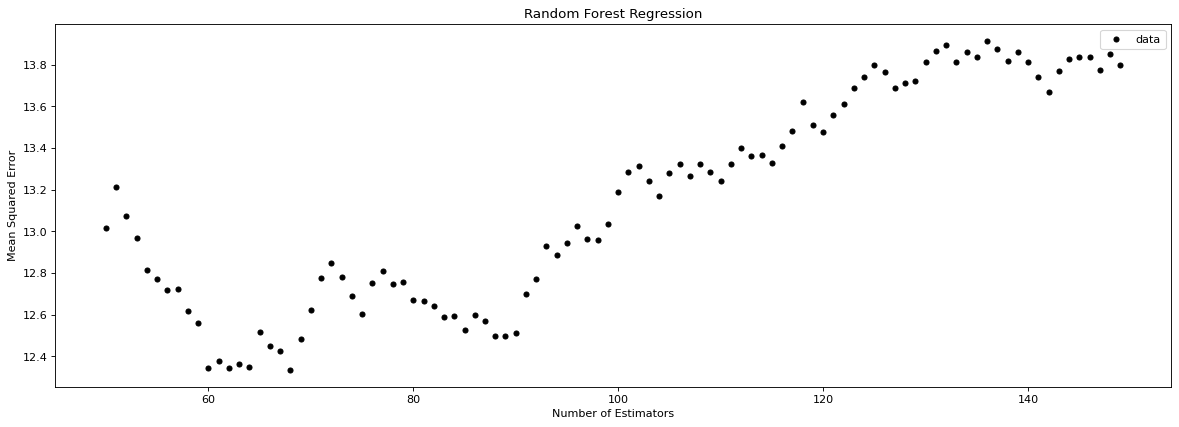

In [65]:
# Plot the results
plt.figure(figsize=(18, 6), dpi=80)
plt.scatter(range(50,150), mse, s=20, edgecolor="black", c="black", label="data")
# plt.scatter(Dec_tree_X_test.T[col], Dec_tree_y_pred, color="blue", label="max_depth=2", alpha=0.3)
# plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.ylabel("Mean Squared Error", color='black')
plt.xlabel("Number of Estimators", color='black')
plt.title("Random Forest Regression")
plt.legend()
plt.show()

##### R Square Vs Number of Estimators

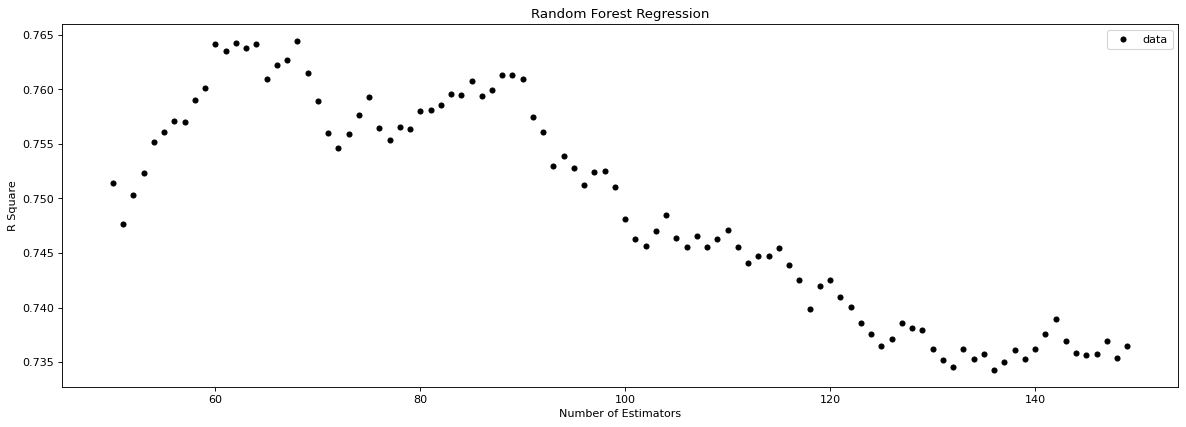

In [66]:
# Plot the results
plt.figure(figsize=(18, 6), dpi=80)
plt.scatter(range(50,150), r2, s=20, edgecolor="black", c="black", label="data")
# plt.scatter(Dec_tree_X_test.T[col], Dec_tree_y_pred, color="blue", label="max_depth=2", alpha=0.3)
# plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.ylabel("R Square", color='black')
plt.xlabel("Number of Estimators", color='black')
plt.title("Random Forest Regression")
plt.legend()
plt.show()

##### TIme Taken to Train Vs Number of Estimators

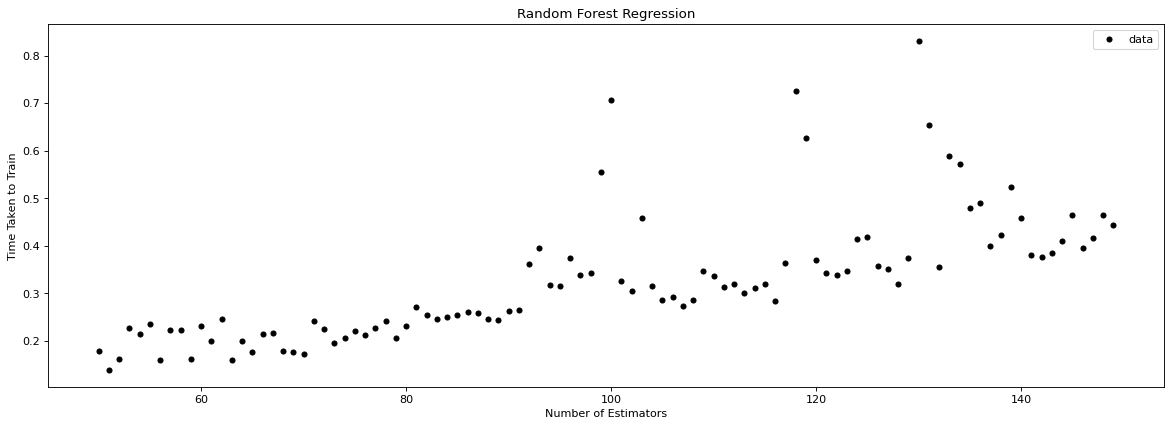

In [67]:
# Plot the results
plt.figure(figsize=(18, 6), dpi=80)
plt.scatter(range(50,150), ttt, s=20, edgecolor="black", c="black", label="data")
# plt.scatter(Dec_tree_X_test.T[col], Dec_tree_y_pred, color="blue", label="max_depth=2", alpha=0.3)
# plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.ylabel("Time Taken to Train", color='black')
plt.xlabel("Number of Estimators", color='black')
plt.title("Random Forest Regression")
plt.legend()
plt.show()

<p>The near optimum number of trees are 68. It has the least mean square error, closest to the top r square value and also has a comparatively low training time.</p>

#### Estimating Tree Depth

##### Calculation

In [116]:
i = 3

ttt = []
mse = []
r2 = []

while i <= 13:

    #Data
    Rand_Forest_X_train = X_train
    Rand_Forest_X_test = X_test

    # print(X_train[linear_columns])

    Rand_Forest_y_train = y_train
    Rand_Forest_y_test = y_test

    # Scaling the data
    # Linear_X_train, Linear_X_test = Normalize(Linear_X_train, Linear_X_test)
    sc_X = StandardScaler()



    Rand_Forest_X_train = sc_X.fit_transform(Rand_Forest_X_train)
    Rand_Forest_X_test = sc_X.transform(Rand_Forest_X_test)

    start = time.time()

    regr = RandomForestRegressor(n_estimators= 68, max_depth= i, random_state= int(time.time()/10000000))
    regr.fit(Rand_Forest_X_train, Rand_Forest_y_train)

    end = time.time()
    print("Time to train : ", end - start)

    ttt.append(end - start)

    Rand_Forest_y_pred = regr.predict(Rand_Forest_X_test)

    # Max Depth
    print("Max Depth: ", i)
    # # The coefficients
    # print("Coefficients: \n", regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(Rand_Forest_y_test, Rand_Forest_y_pred))
    mse.append(mean_squared_error(Rand_Forest_y_test, Rand_Forest_y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(Rand_Forest_y_test, Rand_Forest_y_pred))
    r2.append(r2_score(Rand_Forest_y_test, Rand_Forest_y_pred))
    print()

    i = i + 1


Time to train :  0.15734624862670898
Max Depth:  3
Mean squared error: 15.32
Coefficient of determination: 0.71

Time to train :  0.11830472946166992
Max Depth:  4
Mean squared error: 13.80
Coefficient of determination: 0.74

Time to train :  0.19115829467773438
Max Depth:  5
Mean squared error: 13.77
Coefficient of determination: 0.74

Time to train :  0.14880132675170898
Max Depth:  6
Mean squared error: 12.89
Coefficient of determination: 0.75

Time to train :  0.16755127906799316
Max Depth:  7
Mean squared error: 12.93
Coefficient of determination: 0.75

Time to train :  0.17752528190612793
Max Depth:  8
Mean squared error: 12.25
Coefficient of determination: 0.77

Time to train :  0.16558146476745605
Max Depth:  9
Mean squared error: 12.33
Coefficient of determination: 0.76

Time to train :  0.18949341773986816
Max Depth:  10
Mean squared error: 12.44
Coefficient of determination: 0.76

Time to train :  0.1997814178466797
Max Depth:  11
Mean squared error: 12.62
Coefficient of det

##### Mean Square Error Vs Depth

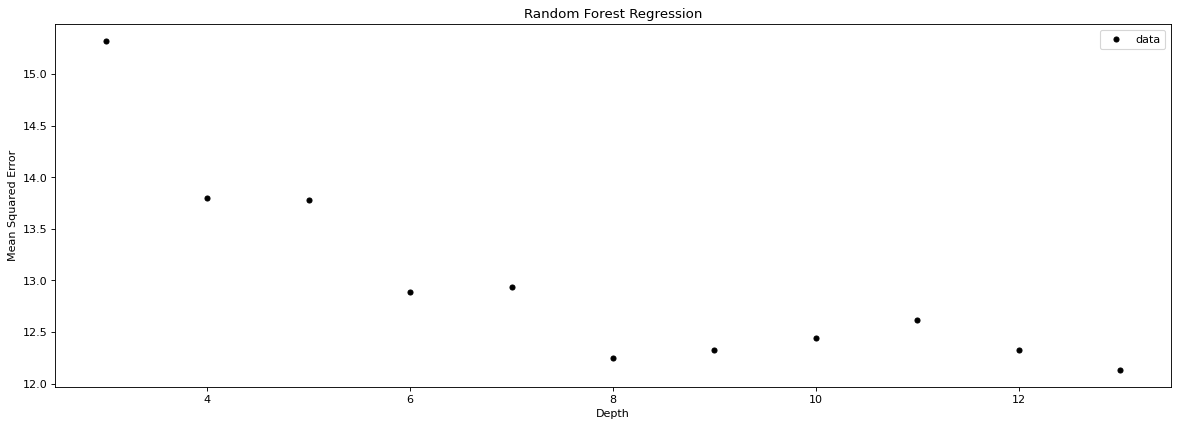

In [117]:
# Plot the results
plt.figure(figsize=(18, 6), dpi=80)
plt.scatter(range(3,14), mse, s=20, edgecolor="black", c="black", label="data")
# plt.scatter(Dec_tree_X_test.T[col], Dec_tree_y_pred, color="blue", label="max_depth=2", alpha=0.3)
# plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.ylabel("Mean Squared Error", color='black')
plt.xlabel("Depth", color='black')
plt.title("Random Forest Regression")
plt.legend()
plt.show()

##### R Square Vs Depth

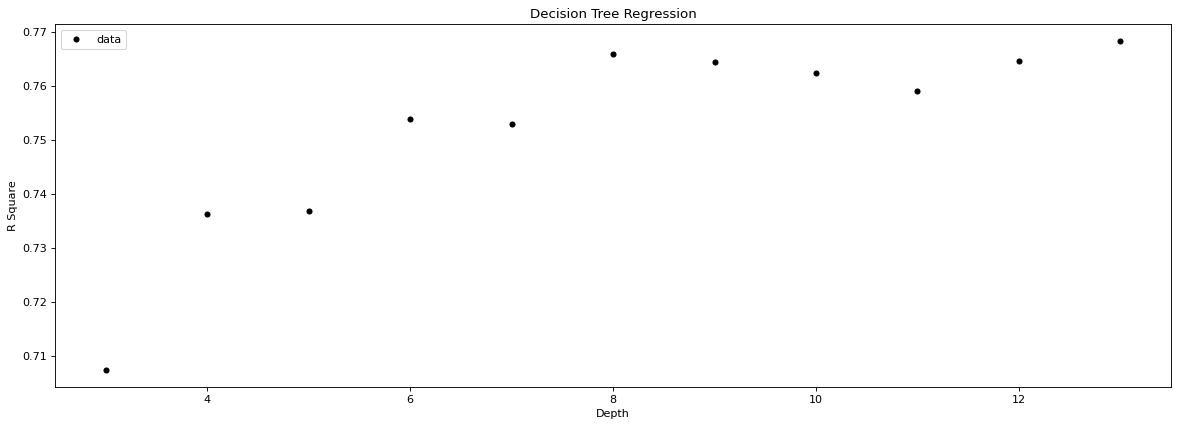

In [118]:
# Plot the results
plt.figure(figsize=(18, 6), dpi=80)
plt.scatter(range(3,14), r2, s=20, edgecolor="black", c="black", label="data")
# plt.scatter(Dec_tree_X_test.T[col], Dec_tree_y_pred, color="blue", label="max_depth=2", alpha=0.3)
# plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.ylabel("R Square", color='black')
plt.xlabel("Depth", color='black')
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

##### Time Taken to Train Vs Depth

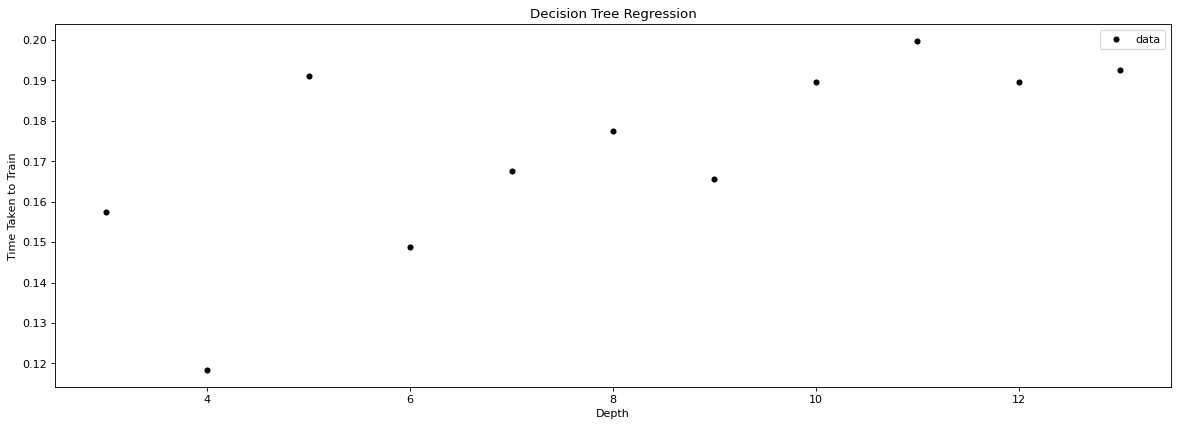

In [119]:
# Plot the results
plt.figure(figsize=(18, 6), dpi=80)
plt.scatter(range(3,14), ttt, s=20, edgecolor="black", c="black", label="data")
# plt.scatter(Dec_tree_X_test.T[col], Dec_tree_y_pred, color="blue", label="max_depth=2", alpha=0.3)
# plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.ylabel("Time Taken to Train", color='black')
plt.xlabel("Depth", color='black')
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

<p>Maximum information is gained when the tree depth is equal to 13 which is basically segregating based on all the available features.</p>

#### Final Model

Time to train :  0.2347249984741211
Number of Estimators:  14
Mean squared error: 12.33
Coefficient of determination: 0.76



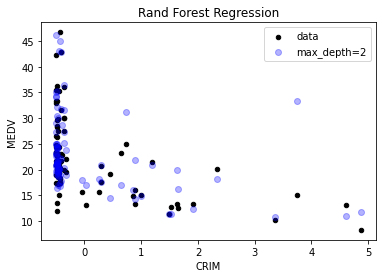

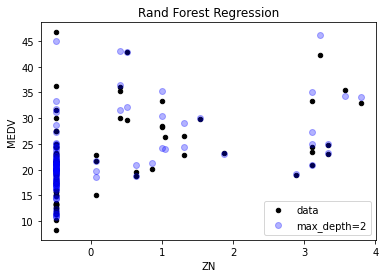

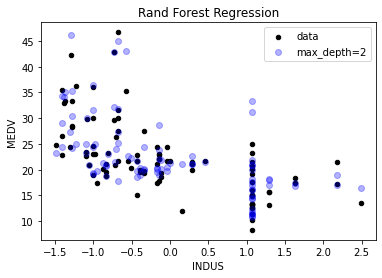

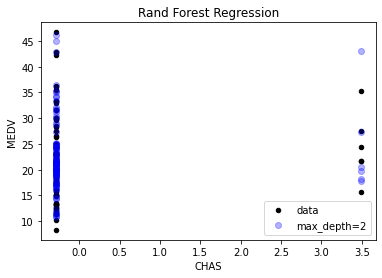

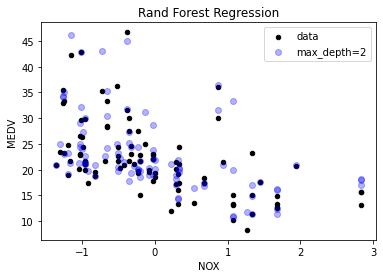

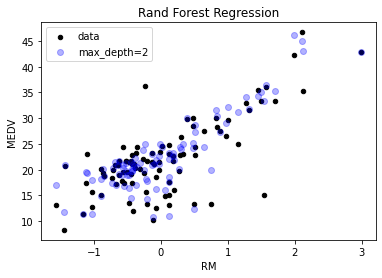

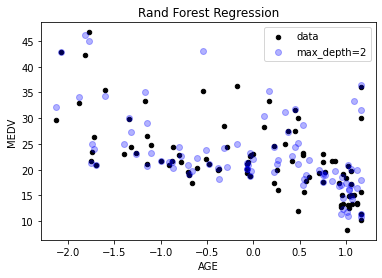

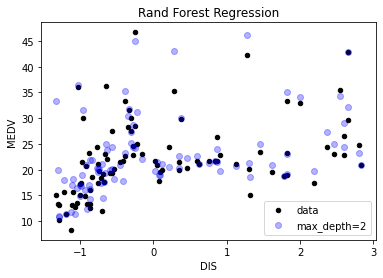

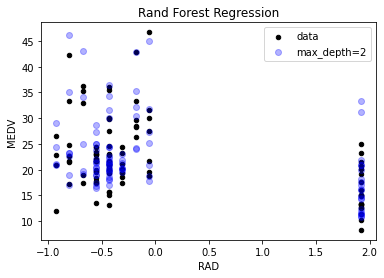

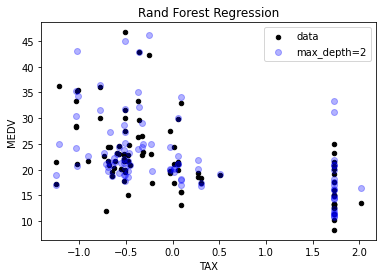

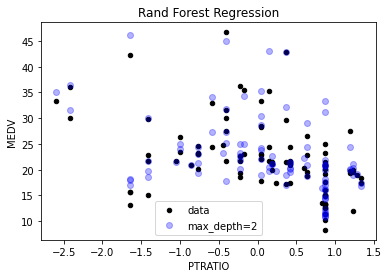

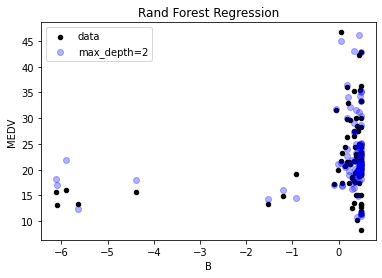

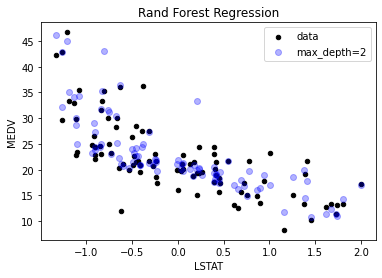

In [76]:

Rand_Forest_columns = X_train.columns

#Data
Rand_Forest_X_train = X_train
Rand_Forest_X_test = X_test

# print(X_train[linear_columns])

Rand_Forest_y_train = y_train
Rand_Forest_y_test = y_test

# Scaling the data
# Linear_X_train, Linear_X_test = Normalize(Linear_X_train, Linear_X_test)
sc_X = StandardScaler()

Rand_Forest_X_train = sc_X.fit_transform(Rand_Forest_X_train)
Rand_Forest_X_test = sc_X.transform(Rand_Forest_X_test)

start = time.time()

regr = RandomForestRegressor(n_estimators= 68, random_state= int(time.time()/10000000))
regr.fit(Rand_Forest_X_train, Rand_Forest_y_train)

end = time.time()
print("Time to train : ", end - start)

Rand_Forest_y_pred = regr.predict(Rand_Forest_X_test)

# Max Depth
print("Number of Estimators: ", i)
# # The coefficients
# print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Rand_Forest_y_test, Rand_Forest_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Rand_Forest_y_test, Rand_Forest_y_pred))
print()

col = 0

while col < 13:
    # Plot the results
    plt.figure()
    plt.scatter(Rand_Forest_X_test.T[col], Rand_Forest_y_test, s=20, edgecolor="black", c="black", label="data")
    plt.scatter(Rand_Forest_X_test.T[col], Rand_Forest_y_pred, color="blue", label="max_depth=2", alpha=0.3)
    # plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
    plt.xlabel(Rand_Forest_columns[col], color='black')
    plt.ylabel("MEDV", color='black')
    plt.title("Rand Forest Regression")
    plt.legend()
    plt.show()

    col = col + 1


#### Summary
<p>The Random Forest regressor functioned its best possible for this dataset when the max depth of tree was undefined and when the number of estimators(decision tree) is equal to 68</p>

### Ada Boosting

<p>We will be using the decision tree regressor as the base regressor to perform boosting on. Since this is a boosting algorithm we will consider all features that have high variance, high correlation with target and low correlation with each other just to make the boosting process effective</p>

#### Determining Variance

In [87]:
a =  X_train.std() / X_train.mean()

a.sort_values()

RM         0.104361
PTRATIO    0.120024
B          0.125399
NOX        0.209237
TAX        0.413777
AGE        0.422755
DIS        0.497157
LSTAT      0.557863
INDUS      0.628454
RAD        0.956536
CRIM       1.998058
ZN         2.057894
CHAS       3.489405
dtype: float64

<p>After checking through the various criteria, ZN feature seems to provide a balancing quality between all three requirements.</p> 
<p>But after multiple tries I believe these 'LSTAT', 'RM', 'PTRATIO', 'INDUS' and 'NOX' to gether provided the most information on the dataset</p>

#### Depth Determination

In [89]:
Dec_tree_columns = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'NOX']

#Data
Dec_tree_X_train = X_train[Dec_tree_columns]
Dec_tree_X_test = X_test[Dec_tree_columns]

# print(X_train[linear_columns])

Dec_tree_y_train = y_train
Dec_tree_y_test = y_test

# Scaling the data
# Linear_X_train, Linear_X_test = Normalize(Linear_X_train, Linear_X_test)
sc_X = StandardScaler()

Dec_tree_X_train = sc_X.fit_transform(Dec_tree_X_train)
Dec_tree_X_test = sc_X.transform(Dec_tree_X_test)

i = 2 

while i <= 9:
    start = time.time()

    regr = DecisionTreeRegressor(max_depth=i)
    regr.fit(Dec_tree_X_train, Dec_tree_y_train)

    end = time.time()

    Dec_tree_y_pred = regr.predict(Dec_tree_X_test)

    # Max Depth
    print("Max Depth: \n", i)
    print("Time to train : ", end - start)
    # # The coefficients
    # print("Coefficients: \n", regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(Dec_tree_y_test, Dec_tree_y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(Dec_tree_y_test, Dec_tree_y_pred))

    i = i + 1




Max Depth: 
 2
Time to train :  0.0009965896606445312
Mean squared error: 20.64
Coefficient of determination: 0.61
Max Depth: 
 3
Time to train :  0.0019948482513427734
Mean squared error: 19.74
Coefficient of determination: 0.62
Max Depth: 
 4
Time to train :  0.0019936561584472656
Mean squared error: 16.24
Coefficient of determination: 0.69
Max Depth: 
 5
Time to train :  0.00299072265625
Mean squared error: 14.51
Coefficient of determination: 0.72
Max Depth: 
 6
Time to train :  0.0029921531677246094
Mean squared error: 13.44
Coefficient of determination: 0.74
Max Depth: 
 7
Time to train :  0.003987789154052734
Mean squared error: 18.29
Coefficient of determination: 0.65
Max Depth: 
 8
Time to train :  0.0029914379119873047
Mean squared error: 19.00
Coefficient of determination: 0.64
Max Depth: 
 9
Time to train :  0.0029926300048828125
Mean squared error: 19.45
Coefficient of determination: 0.63


<p>6 is still the desired depth having minimum Mean Squared Error and Maximum R Square value.</p>

#### Getting Desired Number of Estimators

##### Calculation

In [120]:
Ada_Boost_columns = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'NOX']

#Data
Ada_Boost_X_train = X_train[Dec_tree_columns]
Ada_Boost_X_test = X_test[Dec_tree_columns]

# print(X_train[linear_columns])

Ada_Boost_y_train = y_train
Ada_Boost_y_test = y_test

# Scaling the data
# Linear_X_train, Linear_X_test = Normalize(Linear_X_train, Linear_X_test)
sc_X = StandardScaler()

Ada_Boost_X_train = sc_X.fit_transform(Ada_Boost_X_train)
Ada_Boost_X_test = sc_X.transform(Ada_Boost_X_test)

i = 1

ttt = []
mse = []
r2 = []

while i < 400:
    
    rng = np.random.RandomState(1)

    start = time.time()
    regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=6), n_estimators=i, random_state=rng)
    regr_2.fit(Ada_Boost_X_train, Ada_Boost_y_train)

    end = time.time()
    print("Time to train : ", end - start)

    ttt.append(end - start)

    Ada_Boost_y_pred = regr_2.predict(Ada_Boost_X_test)

    # Max Depth
    print("Number of Estimators: ", i)
    # # The coefficients
    # print("Coefficients: \n", regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(Ada_Boost_y_test, Ada_Boost_y_pred))
    mse.append(mean_squared_error(Ada_Boost_y_test, Ada_Boost_y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(Ada_Boost_y_test, Ada_Boost_y_pred))
    r2.append(r2_score(Ada_Boost_y_test, Ada_Boost_y_pred))
    print()

    i = i + 1


Time to train :  0.004984378814697266
Number of Estimators:  1
Mean squared error: 13.15
Coefficient of determination: 0.75

Time to train :  0.007979631423950195
Number of Estimators:  2
Mean squared error: 25.03
Coefficient of determination: 0.52

Time to train :  0.012966156005859375
Number of Estimators:  3
Mean squared error: 15.04
Coefficient of determination: 0.71

Time to train :  0.013962984085083008
Number of Estimators:  4
Mean squared error: 15.50
Coefficient of determination: 0.70

Time to train :  0.013962745666503906
Number of Estimators:  5
Mean squared error: 10.86
Coefficient of determination: 0.79

Time to train :  0.011966943740844727
Number of Estimators:  6
Mean squared error: 11.31
Coefficient of determination: 0.78

Time to train :  0.012970209121704102
Number of Estimators:  7
Mean squared error: 10.41
Coefficient of determination: 0.80

Time to train :  0.02269911766052246
Number of Estimators:  8
Mean squared error: 11.33
Coefficient of determination: 0.78

T

##### Mean Squared Error Vs Number of Estimators

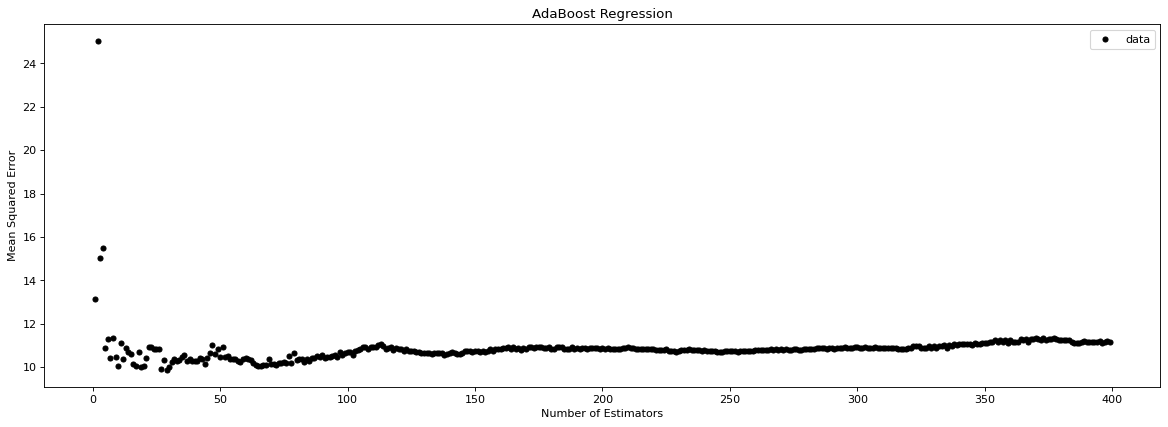

In [121]:
# Plot the results
plt.figure(figsize=(18, 6), dpi=80)
plt.scatter(range(1,400), mse, s=20, edgecolor="black", c="black", label="data")
# plt.scatter(Dec_tree_X_test.T[col], Dec_tree_y_pred, color="blue", label="max_depth=2", alpha=0.3)
# plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.ylabel("Mean Squared Error", color='black')
plt.xlabel("Number of Estimators", color='black')
plt.title("AdaBoost Regression")
plt.legend()
plt.show()

##### R Square Vs Number of Estimators

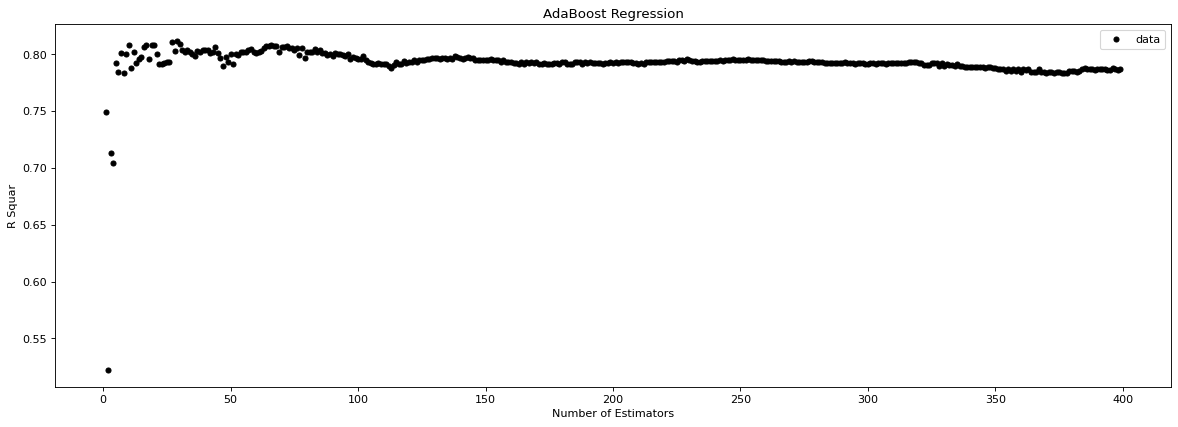

In [122]:
# Plot the results
plt.figure(figsize=(18, 6), dpi=80)
plt.scatter(range(1,400), r2, s=20, edgecolor="black", c="black", label="data")
# plt.scatter(Dec_tree_X_test.T[col], Dec_tree_y_pred, color="blue", label="max_depth=2", alpha=0.3)
# plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.ylabel("R Squar", color='black')
plt.xlabel("Number of Estimators", color='black')
plt.title("AdaBoost Regression")
plt.legend()
plt.show()

##### Time Taken to Train Vs Number of Estimators

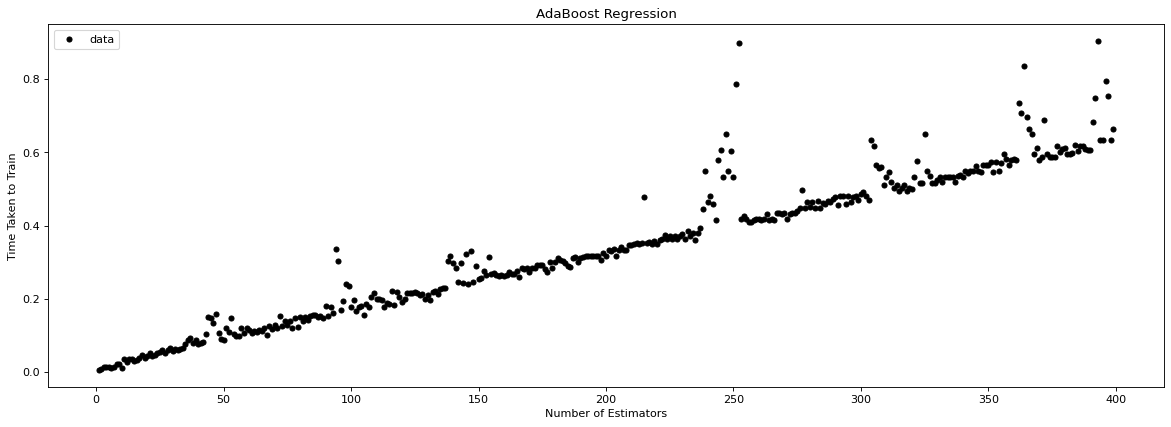

In [123]:
# Plot the results
plt.figure(figsize=(18, 6), dpi=80)
plt.scatter(range(1,400), ttt, s=20, edgecolor="black", c="black", label="data")
# plt.scatter(Dec_tree_X_test.T[col], Dec_tree_y_pred, color="blue", label="max_depth=2", alpha=0.3)
# plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.ylabel("Time Taken to Train", color='black')
plt.xlabel("Number of Estimators", color='black')
plt.title("AdaBoost Regression")
plt.legend()
plt.show()

#### Final Model

<p>From previous calculation it could be seen that maximum of R Square and minimum of Mean Squared Error was achieved when the number of estimators reached a value of 29. Though this feels like the very low number, I believe that this is one of those scenarios where further increasing the number of estimators only affects the speed of the model and there is no sufficient justification to do so.</p>

Time to train :  0.08841252326965332
Number of Estimators: 29
Mean squared error: 9.85
Coefficient of determination: 0.81



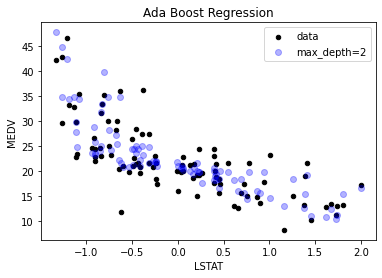

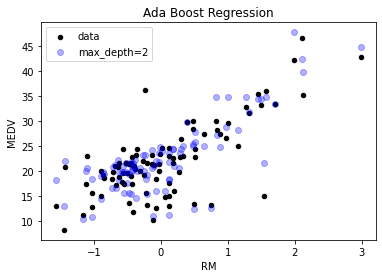

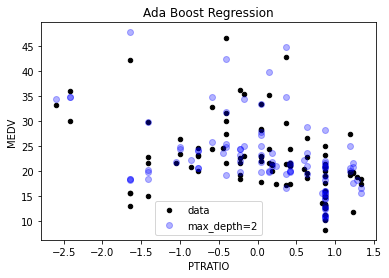

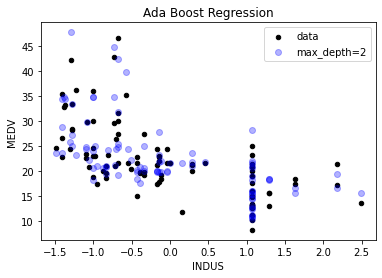

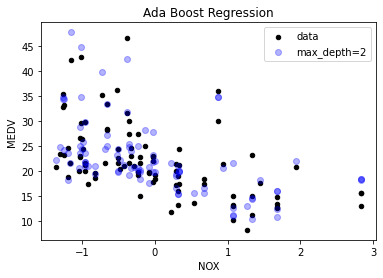

In [135]:
Ada_Boost_columns = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'NOX']

#Data
Ada_Boost_X_train = X_train[Dec_tree_columns]
Ada_Boost_X_test = X_test[Dec_tree_columns]

# print(X_train[linear_columns])

Ada_Boost_y_train = y_train
Ada_Boost_y_test = y_test

# Scaling the data
# Linear_X_train, Linear_X_test = Normalize(Linear_X_train, Linear_X_test)
sc_X = StandardScaler()

Ada_Boost_X_train = sc_X.fit_transform(Ada_Boost_X_train)
Ada_Boost_X_test = sc_X.transform(Ada_Boost_X_test)


    
rng = np.random.RandomState(1)

start = time.time()
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=6), n_estimators=29, random_state=rng)
regr_2.fit(Ada_Boost_X_train, Ada_Boost_y_train)

end = time.time()
print("Time to train : ", end - start)

Ada_Boost_y_pred = regr_2.predict(Ada_Boost_X_test)

# Max Depth
print("Number of Estimators: 29")
# # The coefficients
# print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Ada_Boost_y_test, Ada_Boost_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Ada_Boost_y_test, Ada_Boost_y_pred))
print()

col = 0

while col < len(Ada_Boost_columns):
    # Plot the results
    plt.figure()
    plt.scatter(Ada_Boost_X_test.T[col], Ada_Boost_y_test, s=20, edgecolor="black", c="black", label="data")
    plt.scatter(Ada_Boost_X_test.T[col], Ada_Boost_y_pred, color="blue", label="max_depth=2", alpha=0.3)
    # plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
    plt.xlabel(Ada_Boost_columns[col], color='black')
    plt.ylabel("MEDV", color='black')
    plt.title("Ada Boost Regression")
    plt.legend()
    plt.show()

    col = col + 1


#### Summary
<p>The Ada Boosting Regressor functioned its best when the Decision Tree Regressor contained 5 features, the Decision Tree was allowed to reach max depth and then Ada Boosting Regressor had 29 estimators. </p>

## Summary
<p>For this housing dataset that contained a combination of categorical and continuous data, multiple linear regressor provided the least information, followed by decision tree, random forest and then the Ada Boosting(I would say Ada Boosting and random forest are about the same).</p>